In [5]:
import anndata

import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Patch

from itertools import product

In [2]:
def extract_pathway_cols(df, pathway):
    mask = df.columns.str.startswith(pathway + '-')
    return df.loc[:, mask]

def tab20(arg):
    cmap = plt.get_cmap('tab20')
    return rgb2hex(cmap(arg))

cmap = {
    'CD4 T': tab20(0),
    'CD8 T': tab20(1),
    'CD14 Mono': tab20(2),
    'CD16 Mono': tab20(3),
    'B': tab20(4),
    'DC': tab20(6),
    'NK': tab20(8),
    'T': tab20(10)
}

In [3]:
recons = anndata.read('../data/released/kang_recons.h5ad')

pathways = [
    'INTERFERON_ALPHA_BETA_SIGNALIN',
    'CYTOKINE_SIGNALING_IN_IMMUNE_S',
    'TCR_SIGNALING',
    'CELL_CYCLE']

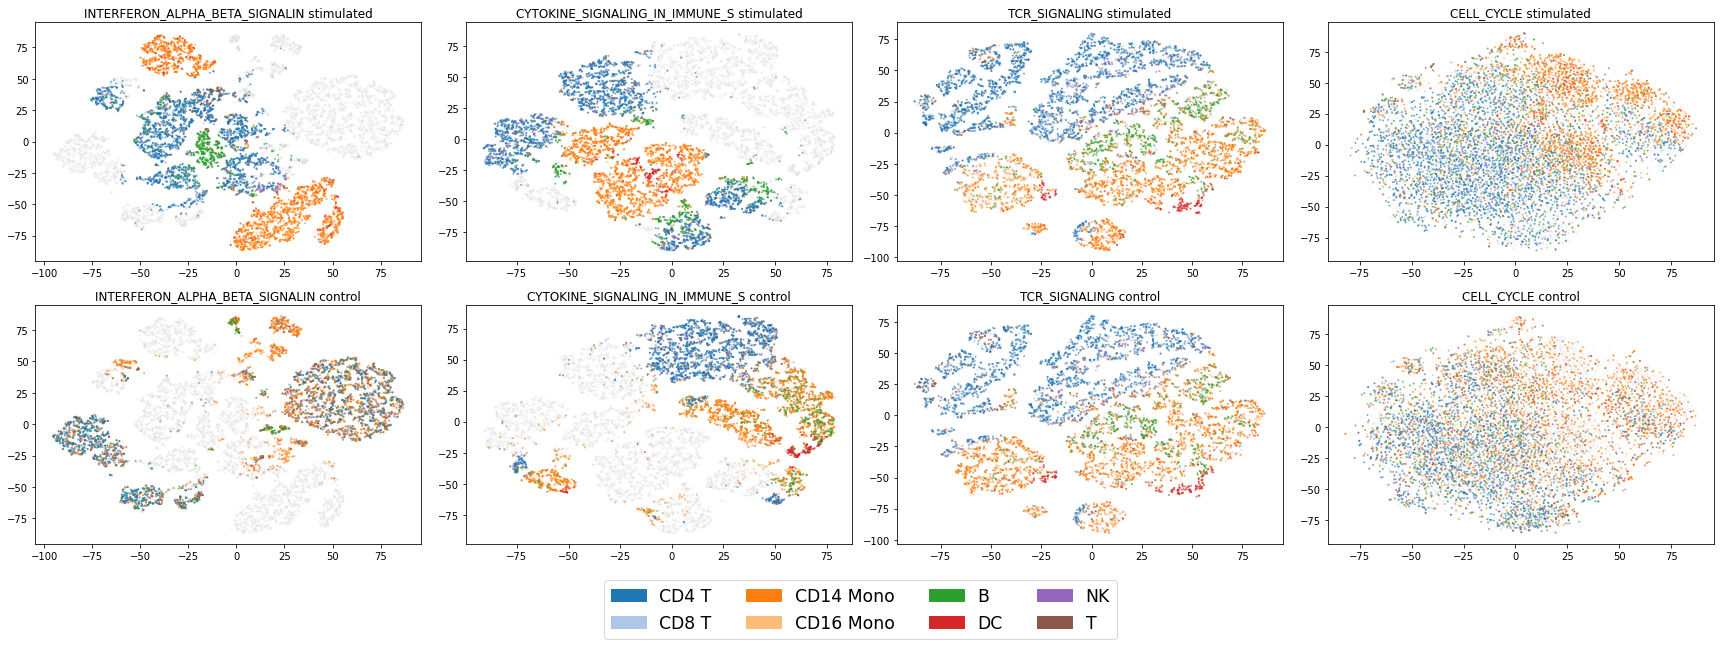

In [6]:
fig, axes = plt.subplots(
    2, len(pathways),
    figsize=(6*len(pathways), 4*2))

pairs = product(['stimulated', 'control'], pathways)

for ax, (active, key) in zip(axes.ravel(), pairs):
    mask = recons.obs['condition'] == active
    codes = extract_pathway_cols(recons.obsm['pathway_tsnes'], key)

    # plot non-active condition
    ax.scatter(
        *codes.loc[~mask].T.values,
        s=1, c='lightgrey', alpha=0.1
    )
    
    # plot active condition
    ax.scatter(
        *codes.loc[mask].T.values,
        c=list(map(cmap.get, recons.obs.loc[mask, 'cell_type'])),
        s=1,
        alpha=0.5,
    )
    ax.set_title(f'{key} {active}')

fig.legend(
    handles=[Patch(color=c, label=l) for l,c in cmap.items()],
    ncol=4,
    loc=('upper center'),
    bbox_to_anchor=(0.5, 0),
    fontsize='xx-large'
)

plt.tight_layout()
plt.show()